--- GET DATA ---

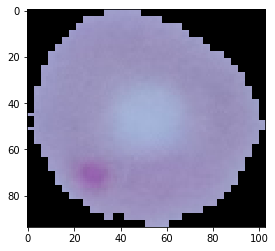

In [8]:

import cv2
import matplotlib.pyplot as plt



image = cv2.imread("/home/max/Dokumente/Lissabon/Bootcamp/project/DataClass2/Malaria2/Data2/Parasitized_2/C39P4thinF_original_IMG_20150622_105253_cell_91.png")
plt.imshow(image, interpolation='nearest')
plt.show()

--- INSTANTIATE PRE-TRAINED MODELS ---

In [11]:
from tensorflow import keras


primary_classifier_model = keras.models.load_model('/home/max/Dokumente/Lissabon/Bootcamp/project/Packaging/PrimaryClassifier/saved_model.pb')

malaria_model = keras.models.load_model('/home/max/Dokumente/Lissabon/Bootcamp/project/Packaging/MalariaClassifier/saved_model.pb')



OSError: SavedModel file does not exist at: /home/max/Dokumente/Lissabon/Bootcamp/project/Packaging/PrimaryClassifier/saved_model.pb/{saved_model.pbtxt|saved_model.pb}

--- CONSTRUCT PIPELINE ---

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

malaria_model.predict(image)


NameError: name 'malaria_model' is not defined